# "Análisis de Datos del Brote de Sarampión 2025: Factores de Riesgo, Mortalidad y Epicentro"

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("base_sarampion_confirmados.csv")

df['FECHA_DIAGNOSTICO'] = pd.to_datetime(df['FECHA_DIAGNOSTICO'])

In [28]:
# Cuenta cuántas veces aparece un ID_REGISTRO repetido
duplicados_count = df['ID_REGISTRO'].duplicated().sum()

if duplicados_count > 0:
    print(f"Se encontraron {duplicados_count} registros duplicados.")
else:
    print("No hay ID_REGISTRO duplicados.")

No hay ID_REGISTRO duplicados.


### 1. Introducción: Vigilancia Epidemiológica de Sarampión
Contexto del Estudio

El sarampión es una enfermedad viral altamente contagiosa que afecta principalmente a niños y se transmite por gotas procedentes de la nariz, boca y faringe. A pesar de la disponibilidad de una vacuna segura y eficaz, sigue siendo una de las principales causas de muerte en niños pequeños a nivel mundial.

Este estudio se enfoca en analizar la base de datos consolidada de casos sospechosos que resultaron en un Diagnóstico Positivo (Categoría 1).

#### Descripción del Dataset

La base de datos analizada es el resultado de la concatenación de registros semanales desde finales de 2020 hasta inicios de 2026. Tras el proceso de limpieza y filtrado, el universo de estudio consiste en:

- Total de casos confirmados: 7,107 registros.

- Periodo de tiempo: Marzo 2020 - Enero 2026.

- Variables principales: Edad, Sexo, Estado Vacunal, Entidad de Residencia y Fecha de Actualización.

### 2. Análisis Temporal

In [29]:
resumen_mensual = df.resample('MS', on='FECHA_DIAGNOSTICO').size().reset_index()
resumen_mensual.columns = ['Fecha', 'Casos']
resumen_mensual['Año'] = resumen_mensual['Fecha'].dt.year
resumen_mensual['Mes'] = resumen_mensual['Fecha'].dt.month

print("Resumen de los primeros meses del estudio:")
resumen_mensual

Resumen de los primeros meses del estudio:


,Fecha,Casos,Año,Mes
0,2020-03-01,89,2020,3
1,2020-04-01,90,2020,4
2,2020-05-01,10,2020,5
3,2020-06-01,5,2020,6
4,2020-07-01,2,2020,7
...,...,...,...,...
66,2025-09-01,375,2025,9
67,2025-10-01,358,2025,10
68,2025-11-01,307,2025,11
69,2025-12-01,692,2025,12


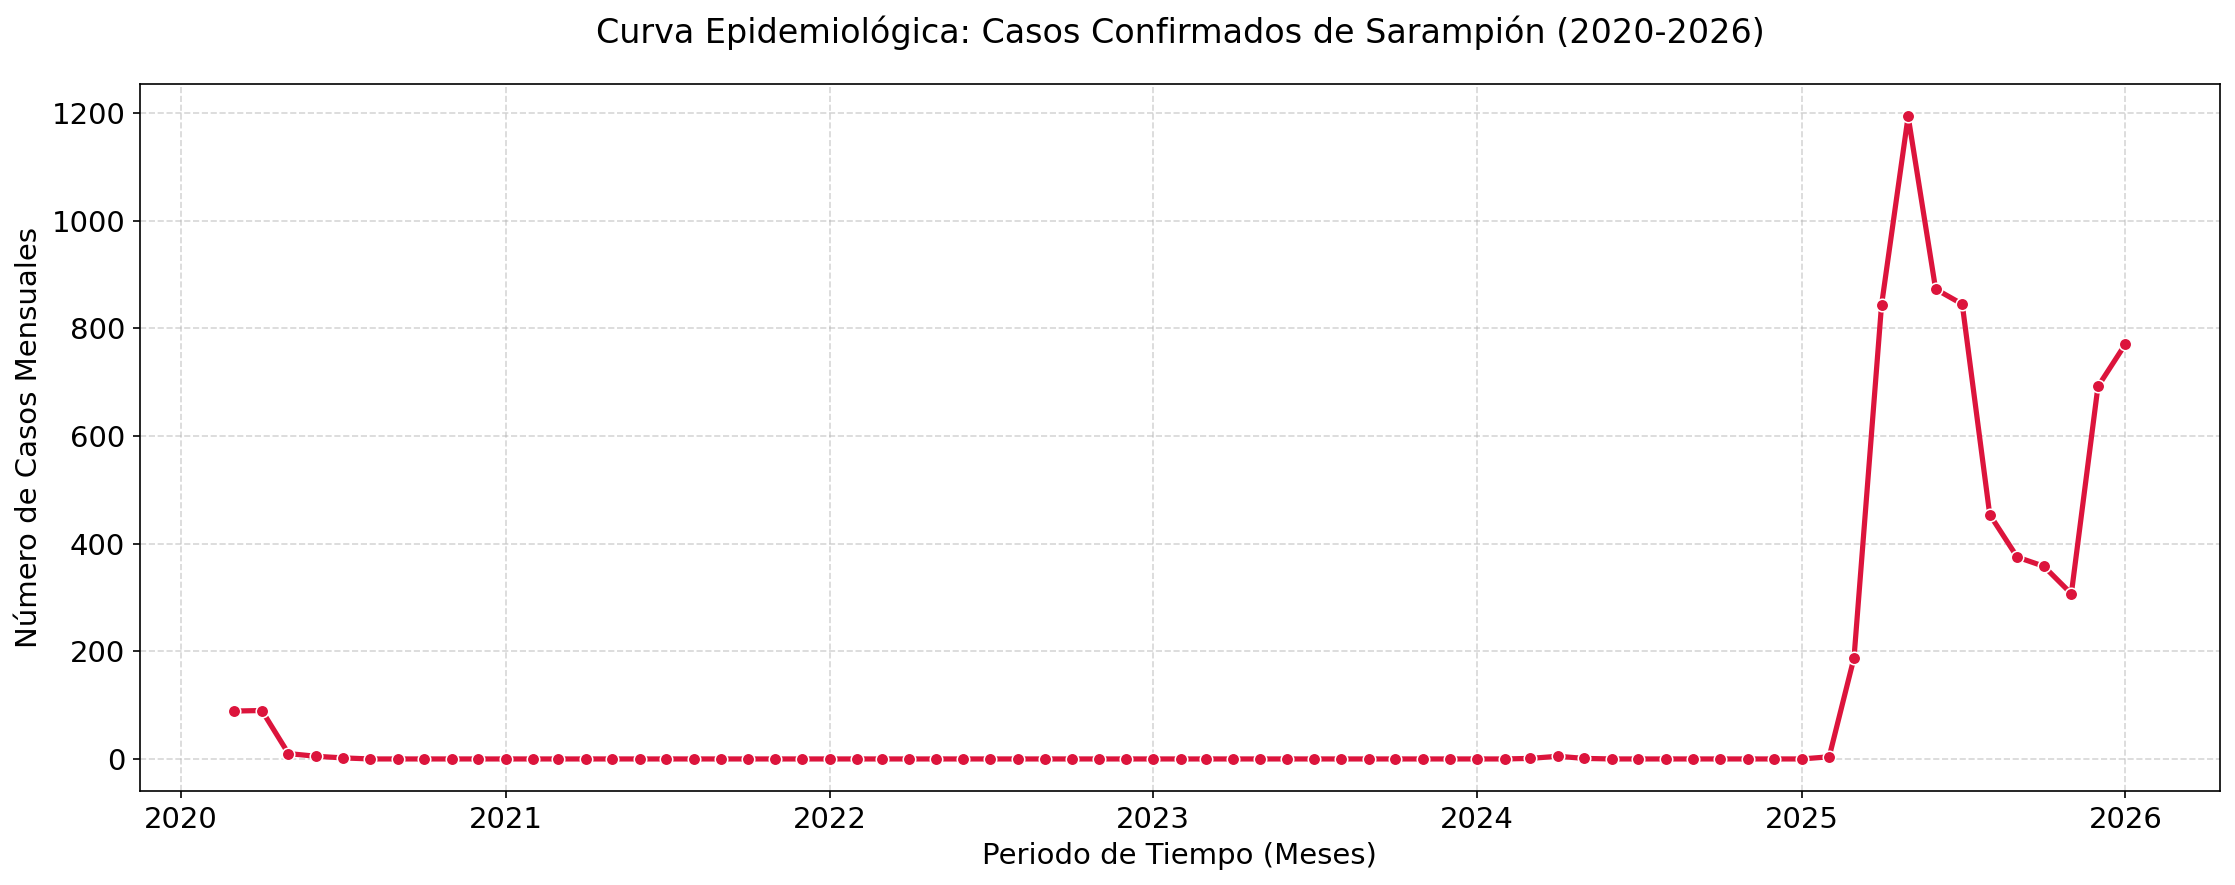

In [33]:
plt.figure(figsize=(15, 6),dpi=150)
sns.lineplot(data=resumen_mensual, x='Fecha', y='Casos', marker='o', color='crimson', linewidth=2.5)

plt.title('Curva Epidemiológica: Casos Confirmados de Sarampión (2020-2026)', fontsize=16, pad=20)
plt.xlabel('Periodo de Tiempo (Meses)', fontsize=14)
plt.ylabel('Número de Casos Mensuales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

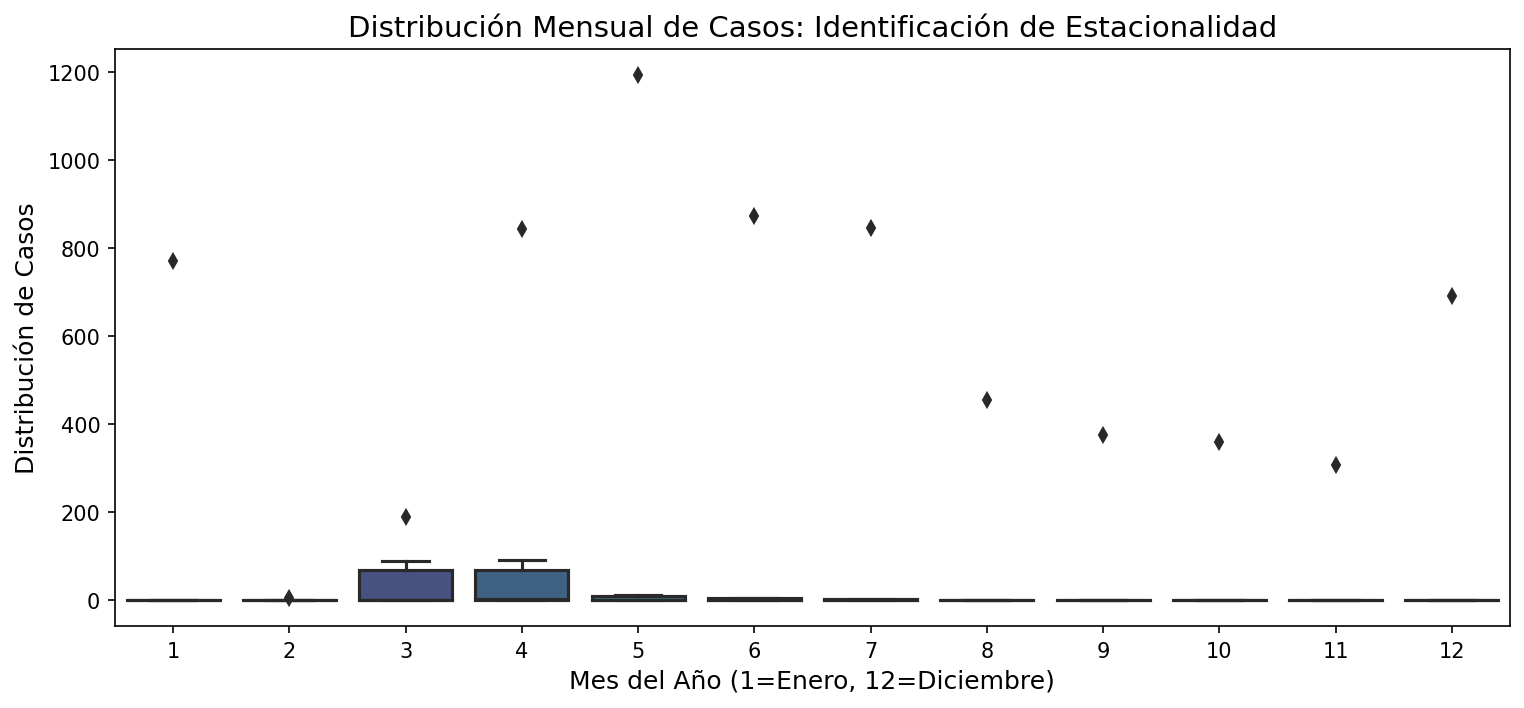

In [11]:
plt.figure(figsize=(12, 5),dpi=150)
sns.boxplot(data=resumen_mensual, x='Mes', y='Casos', palette='viridis')

plt.title('Distribución Mensual de Casos: Identificación de Estacionalidad', fontsize=14)
plt.xlabel('Mes del Año (1=Enero, 12=Diciembre)', fontsize=12)
plt.ylabel('Distribución de Casos', fontsize=12)
#plt.ylim(0, 200)
plt.show()

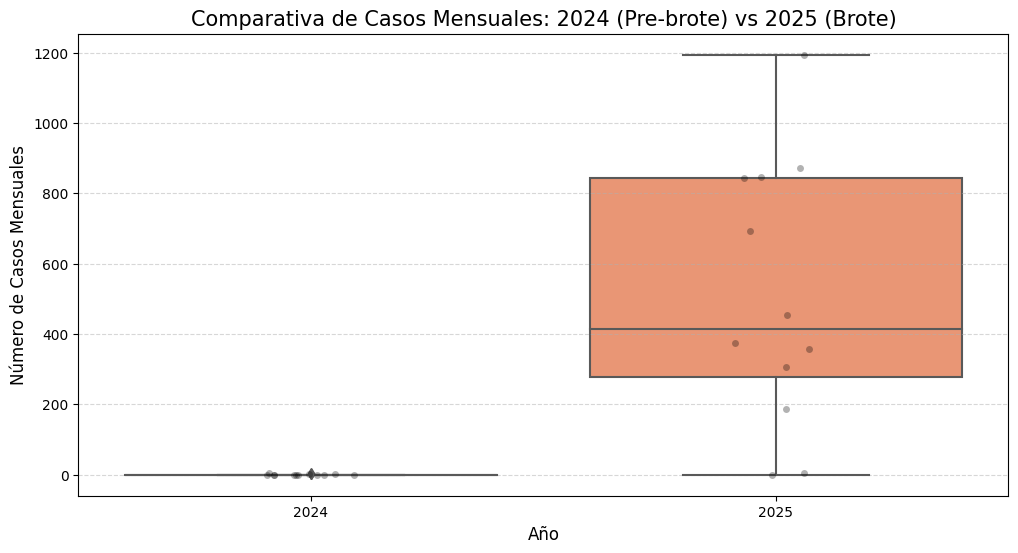

In [12]:
df_comparativa = resumen_mensual[resumen_mensual['Año'].isin([2024, 2025])]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_comparativa, x='Año', y='Casos', palette='Set2')

sns.stripplot(data=df_comparativa, x='Año', y='Casos', color='black', alpha=0.3)

plt.title('Comparativa de Casos Mensuales: 2024 (Pre-brote) vs 2025 (Brote)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Casos Mensuales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Con los casos confirmados se construyó una serie mensual (conteo por mes) y se graficó la curva epidemiológica 2020–2026, observando un periodo de baja incidencia sostenida seguido de un incremento abrupto asociado al brote, con un máximo marcado y una posterior disminución parcial. Para explorar posibles patrones recurrentes, se analizó la distribución por mes del año (boxplots), lo que permite identificar si el brote se concentra en meses específicos o si predomina una dinámica no estacional. Finalmente, se compararon los conteos mensuales de 2024 (pre-brote) vs 2025 (brote) mediante diagramas de caja, evidenciando un cambio de régimen: 2024 permanece cerca de cero, mientras que 2025 muestra valores altos y gran variabilidad, consistente con una fase epidémica activa y heterogénea en el tiempo.

### 3. Análisis Demográfico

En esta sección exploramos las características de edad y sexo de los 109,458 casos confirmados. Esto nos permitirá identificar si el brote actual tiene un perfil pediátrico o si afecta a adultos jóvenes, lo cual sugeriría brechas en la inmunización histórica.

In [13]:
bins = [0, 1, 5, 12, 18, 30, 50, 100]
labels = ['<1 año', '1-5 años', '6-12 años', '13-18 años', '19-30 años', '31-50 años', '>50 años']

df['GRUPO_EDAD'] = pd.cut(df['EDAD_ANOS'], bins=bins, labels=labels, right=False)

dist_edad = df['GRUPO_EDAD'].value_counts(normalize=True).sort_index() * 100

print("Distribución porcentual por grupo de edad:")
print(dist_edad)

Distribución porcentual por grupo de edad:
GRUPO_EDAD
<1 año        10.046433
1-5 años      15.449557
6-12 años     15.013367
13-18 años    10.595188
19-30 años    24.961306
31-50 años    21.725060
>50 años       2.209090
Name: proportion, dtype: float64


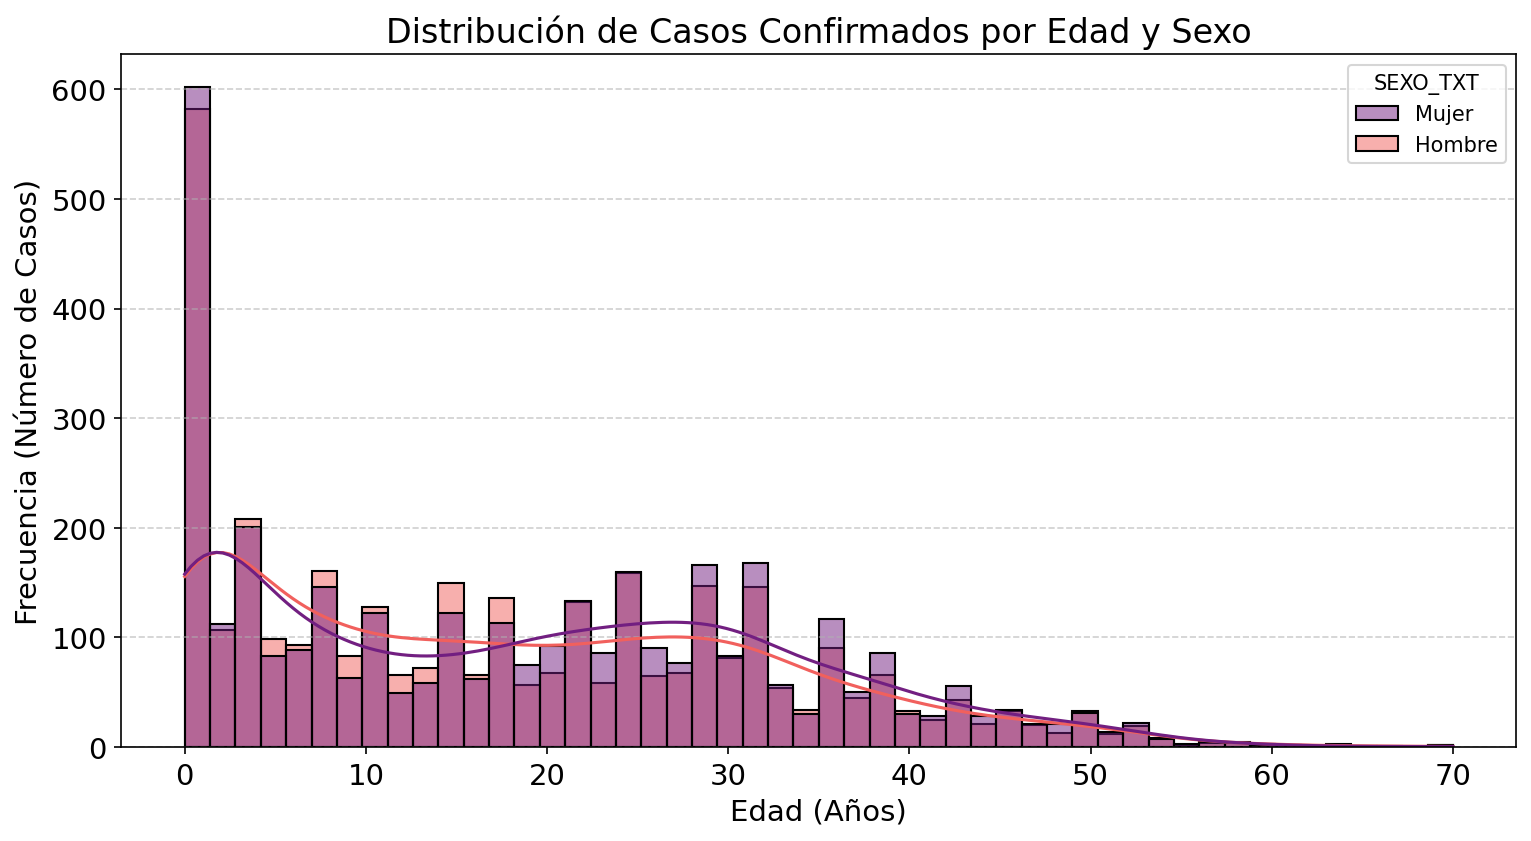

In [14]:
plt.figure(figsize=(12, 6),dpi=150)

df['SEXO_TXT'] = df['SEXO'].map({1: 'Mujer', 2: 'Hombre'})

sns.histplot(data=df, x='EDAD_ANOS', hue='SEXO_TXT', bins=50, kde=True, palette='magma')

plt.title('Distribución de Casos Confirmados por Edad y Sexo', fontsize=16)
plt.xlabel('Edad (Años)', fontsize=14)
plt.ylabel('Frecuencia (Número de Casos)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tick_params(labelsize=14)
plt.show()

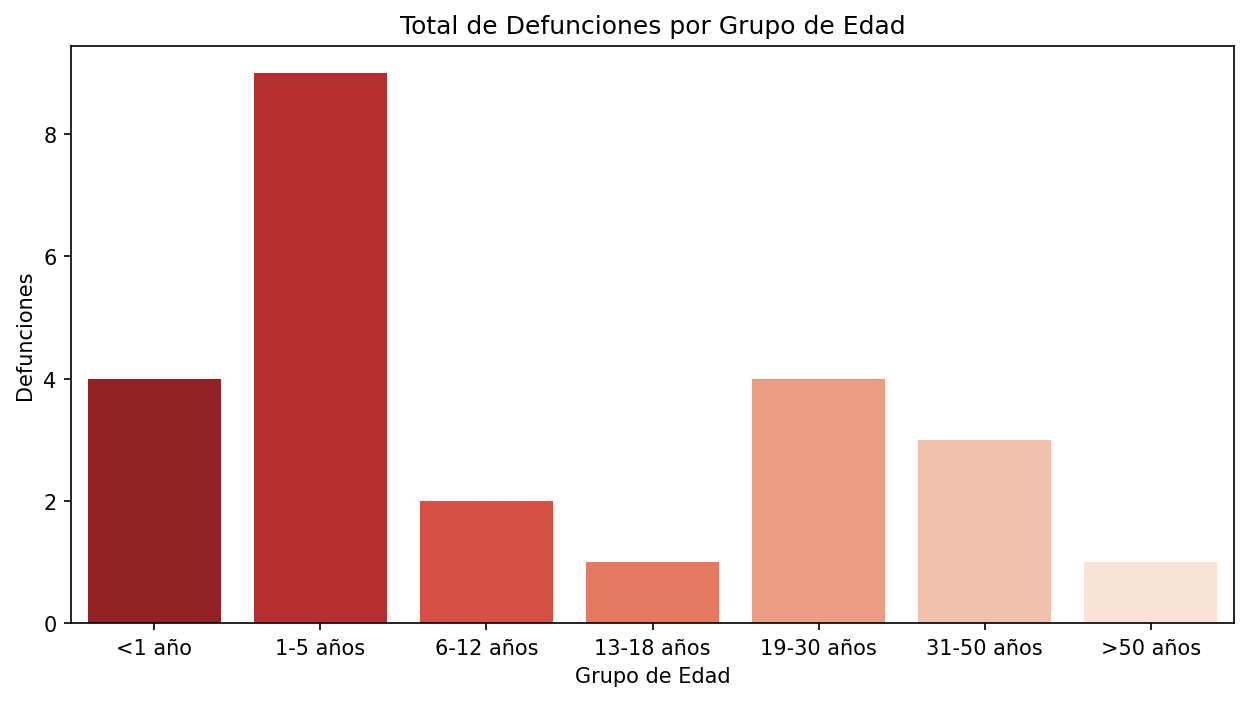

In [15]:
# Tasa de defunción por grupo de edad
letalidad = df.groupby('GRUPO_EDAD')['DEFUNCION'].apply(lambda x: (x == 1).sum()).reset_index()
letalidad.columns = ['Grupo de Edad', 'Defunciones']

plt.figure(figsize=(10, 5),dpi=150)
sns.barplot(data=letalidad, x='Grupo de Edad', y='Defunciones', palette='Reds_r')
plt.title('Total de Defunciones por Grupo de Edad', fontsize=12)
plt.show()

En el análisis demográfico se caracterizó la población de casos confirmados por edad y sexo, observando una distribución asimétrica con mayor concentración en edades tempranas y adultas jóvenes, y diferencias suaves entre hombres y mujeres a lo largo del rango etario (histogramas superpuestos). Para sintetizar la estructura por edad, se calculó la **distribución porcentual por grupo etario**, identificando como grupos predominantes a **19–30 años (24.96%)** y **31–50 años (21.73%)**, seguidos de **1–5 años (15.45%)** y **6–12 años (15.01%)**; los menores de **<1 año** representan **10.05%**, mientras que **13–18 años** aporta **10.60%** y el grupo **>50 años** es minoritario (**2.21%**). Adicionalmente, se evaluó la **mortalidad por grupos de edad**, donde las defunciones se concentran principalmente en **1–5 años** y, en menor medida, en adultos jóvenes y de mediana edad, lo que sugiere priorizar la interpretación epidemiológica y las acciones de prevención considerando tanto la alta carga de casos en 19–50 años como la mayor vulnerabilidad clínica en los grupos pediátricos.


### 4. Análisis de Vacunación

En esta sección, evaluamos si los casos confirmados contaban con antecedente de vacunación.

In [16]:
mapping_vacuna = {1: 'Vacunado', 2: 'No Vacunado', 9: 'Ignorado'}
df['VACUNACION_TXT'] = df['VACUNACION'].map(mapping_vacuna).fillna('Sin Dato')

resumen_vac = df['VACUNACION_TXT'].value_counts(normalize=True) * 100
print("Estado de vacunación global en casos confirmados:")
print(resumen_vac)

Estado de vacunación global en casos confirmados:
VACUNACION_TXT
No Vacunado    84.747432
Vacunado       15.252568
Name: proportion, dtype: float64


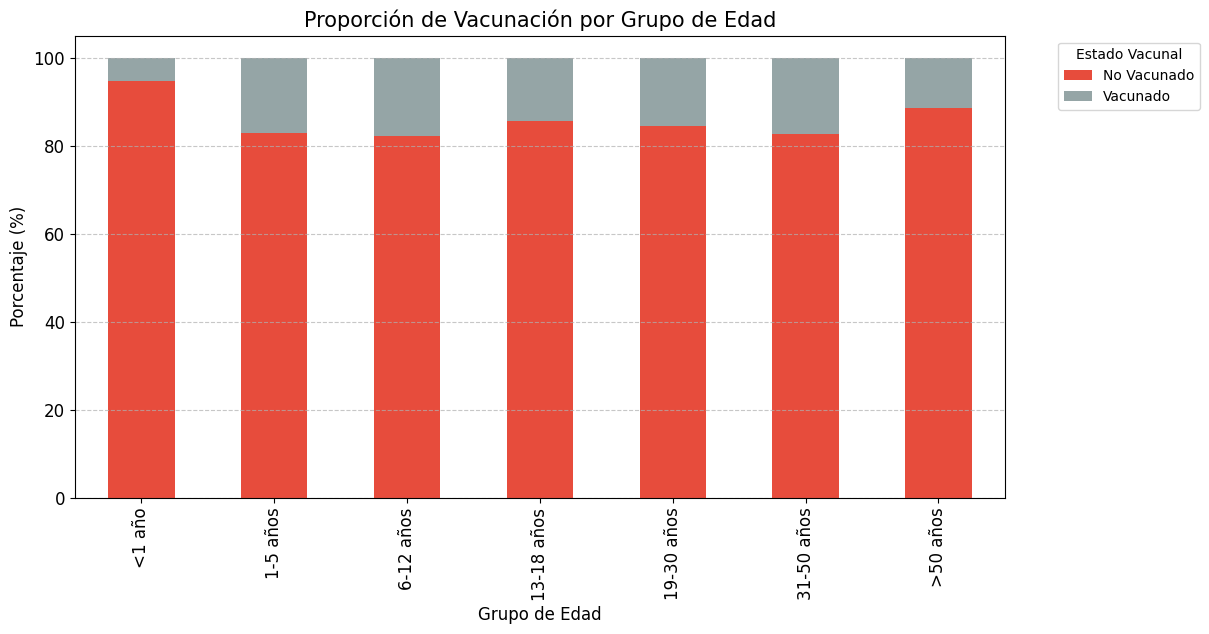

In [17]:
tabla_vac_edad = pd.crosstab(df['GRUPO_EDAD'], df['VACUNACION_TXT'], normalize='index') * 100

tabla_vac_edad.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#e74c3c', '#95a5a6', '#2ecc71', '#3498db'])

plt.title('Proporción de Vacunación por Grupo de Edad', fontsize=15)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Estado Vacunal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tick_params(labelsize=12)
plt.show()

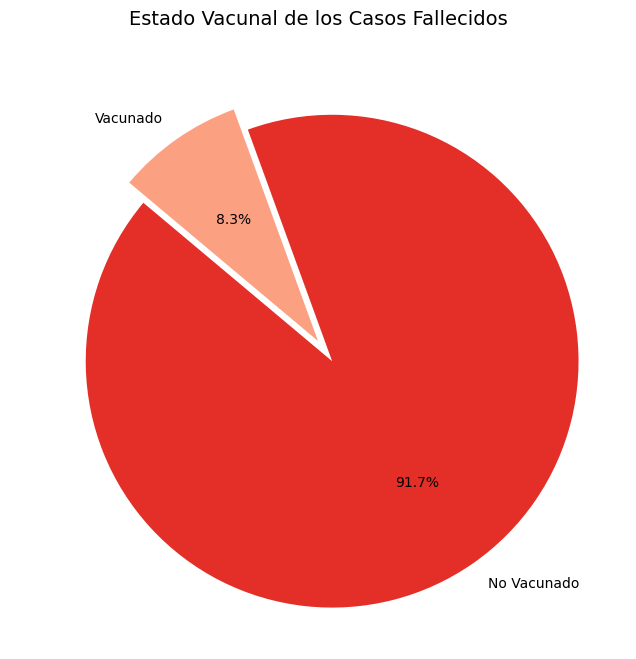

In [18]:
defunciones_vac = df[df['DEFUNCION'] == 1]['VACUNACION_TXT'].value_counts()

if not defunciones_vac.empty:
    plt.figure(figsize=(8, 8))
    
    mi_explode = [0.1 if i == 0 else 0 for i in range(len(defunciones_vac))]
    
    mis_colores = sns.color_palette("Reds_r", n_colors=len(defunciones_vac))

    plt.pie(defunciones_vac, 
            labels=defunciones_vac.index, 
            autopct='%1.1f%%', 
            colors=mis_colores, 
            startangle=140, 
            explode=mi_explode)
    
    plt.title('Estado Vacunal de los Casos Fallecidos', fontsize=14)
    plt.show()
else:
    print("No se encontraron registros de defunciones para este análisis.")

En el análisis de vacunación se evaluó el estado vacunal de los casos confirmados, encontrando que, a nivel global, predomina ampliamente la condición de **no vacunado (84.75%)**, mientras que solo **15.25%** de los casos reporta estar **vacunado**. Al estratificar por **grupo de edad**, el gráfico de barras apiladas muestra que la proporción de **no vacunados** se mantiene alta en todos los grupos, con variaciones moderadas: el grupo **<1 año** presenta la mayor fracción de no vacunados, y los grupos **1–5, 6–12, 19–30 y 31–50 años** exhiben una proporción de vacunación ligeramente mayor, aunque todavía minoritaria. Finalmente, al analizar específicamente los **casos fallecidos**, la distribución del estado vacunal sugiere una fuerte concentración de defunciones en **no vacunados** (≈**91.7%**), con una fracción pequeña en **vacunados** (≈**8.3%**), lo cual es consistente con la importancia de la vacunación como factor clave para reducir el riesgo de desenlaces severos; estos resultados deben interpretarse considerando posibles faltantes o errores de registro en la variable de vacunación.


### 5. Distribución Geográfica

En esta sección final, identificamos las regiones de México que concentraron la mayor carga de la enfermedad durante el brote de 2025. Esto es crucial para entender dónde fallaron los cercos epidemiológicos y dónde se requieren campañas de vacunación intensivas.

In [19]:
catálogo_estados = {
    1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur', 4: 'Campeche',
    5: 'Coahuila', 6: 'Colima', 7: 'Chiapas', 8: 'Chihuahua', 9: 'Ciudad de México',
    10: 'Durango', 11: 'Guanajuato', 12: 'Guerrero', 13: 'Hidalgo', 14: 'Jalisco',
    15: 'México', 16: 'Michoacán', 17: 'Morelos', 18: 'Nayarit', 19: 'Nuevo León',
    20: 'Oaxaca', 21: 'Puebla', 22: 'Querétaro', 23: 'Quintana Roo', 24: 'San Luis Potosí',
    25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco', 28: 'Tamaulipas', 29: 'Tlaxcala',
    30: 'Veracruz', 31: 'Yucatán', 32: 'Zacatecas'
}


df['ESTADO_RESIDENCIA'] = df['ENTIDAD_RES'].map(catálogo_estados)

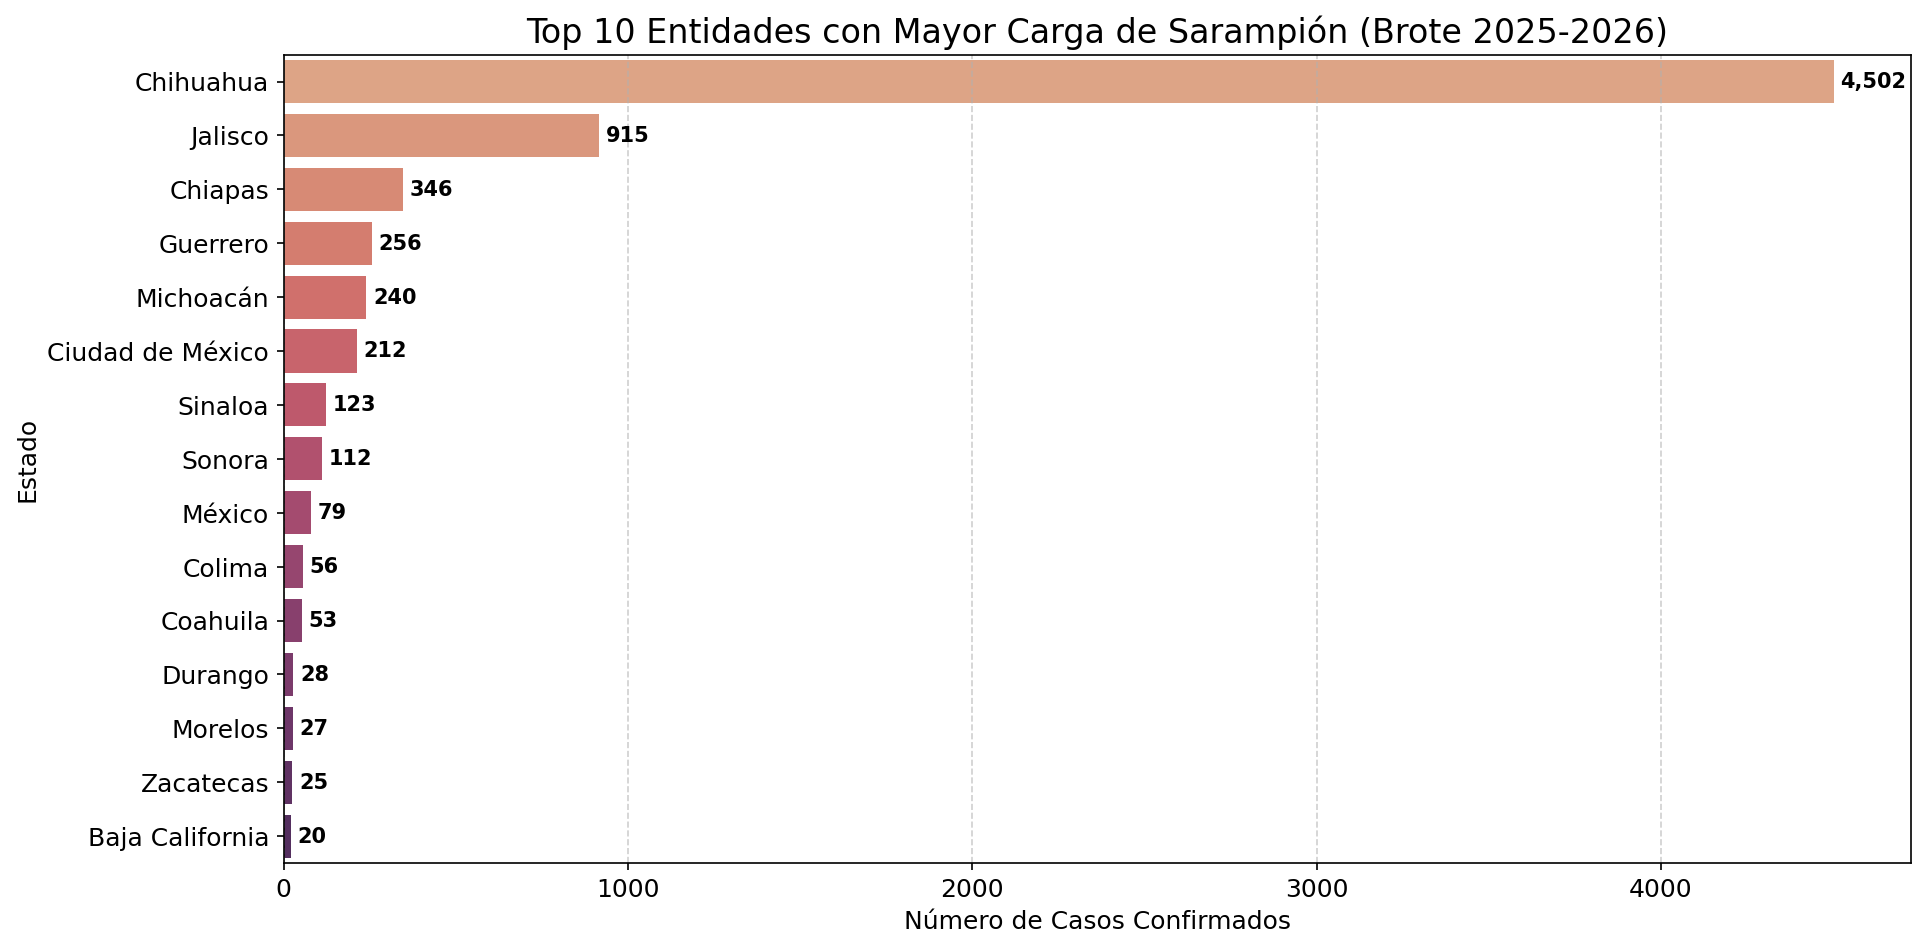

In [24]:
top_estados = df['ESTADO_RESIDENCIA'].value_counts().head(15)

plt.figure(figsize=(14, 7),dpi=150)
sns.barplot(x=top_estados.values, y=top_estados.index, palette='flare')
plt.title('Top 10 Entidades con Mayor Carga de Sarampión (Brote 2025-2026)', fontsize=16)
plt.xlabel('Número de Casos Confirmados', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tick_params(labelsize=12)

for i, v in enumerate(top_estados.values):
    plt.text(v + 20, i, f'{v:,}', va='center', fontweight='bold')

plt.show()

In [41]:
tabla_estado = (df["ENTIDAD_RES"].map(catálogo_estados)
                .value_counts(dropna=False)
                .rename_axis("Estado")
                .to_frame("n")
                .assign(pct=lambda x: (x["n"]/x["n"].sum()*100).round(2))
                .sort_values("n", ascending=False)
               )

tabla_estado

,n,pct
Estado,,
Chihuahua,4502,63.35
Jalisco,915,12.87
Chiapas,346,4.87
Guerrero,256,3.60
Michoacán,240,3.38
Ciudad de México,212,2.98
Sinaloa,123,1.73
Sonora,112,1.58
México,79,1.11


In [25]:
defunciones_estado = df[df['DEFUNCION'] == 1]['ESTADO_RESIDENCIA'].value_counts().head(5)

print("Estados con mayor mortalidad acumulada:")
print(defunciones_estado)

Estados con mayor mortalidad acumulada:
ESTADO_RESIDENCIA
Chihuahua    22
Sonora        1
Jalisco       1
Name: count, dtype: int64


En el análisis de distribución geográfica se caracterizó la carga del brote (2025–2026) a nivel de entidad federativa, identificando una concentración marcada de casos en un número reducido de estados. El ranking de “Top entidades” muestra un patrón fuertemente desigual, donde Chihuahua destaca como el principal foco con 4,502 casos confirmados, seguido a gran distancia por Jalisco (915) y después Chiapas (346), Guerrero (256), Michoacán (240) y Ciudad de México (212), mientras que el resto de entidades del listado presenta conteos mucho menores, lo que sugiere heterogeneidad espacial en la transmisión y/o en la detección. En términos de severidad, al evaluar la mortalidad acumulada por estado de residencia se observa que las defunciones se concentran casi por completo en Chihuahua (22), con valores marginales en Sonora (1) y Jalisco (1); este patrón es consistente con que la mayor carga de casos también se acompaña de mayor mortalidad, y subraya la necesidad de priorizar acciones de respuesta y búsqueda activa en los focos principales, interpretando los resultados con cautela ante posibles diferencias en subregistro y oportunidad diagnóstica entre entidades.

La distribución geográfica de los casos confirmados muestra una concentración muy marcada en pocas entidades. En particular, **Chihuahua** concentra **4,502 casos (63.35%)**, lo que indica que casi **dos de cada tres** casos del periodo analizado se localizan en esa entidad. A gran distancia aparecen **Jalisco** con **915 (12.87%)** y, posteriormente, un grupo de contribución intermedia conformado por **Chiapas** (**346; 4.87%**), **Guerrero** (**256; 3.60%**), **Michoacán** (**240; 3.38%**) y **Ciudad de México** (**212; 2.98%**). El resto de los estados aporta proporciones individuales menores a **2%**, lo cual sugiere una fuerte **heterogeneidad espacial** y la presencia de un foco principal de transmisión en el norte del país, acompañado de focos secundarios dispersos. Este patrón es consistente con un brote altamente localizado, por lo que el análisis y la respuesta epidemiológica deben priorizar las entidades con mayor carga, sin perder de vista posibles diferencias en oportunidad diagnóstica y subregistro entre estados.


### 6. Conclusiones y Recomendaciones Finales


En conclusión, el análisis descriptivo de los casos confirmados de sarampión evidencia un cambio abrupto de régimen a partir de 2025, compatible con un brote de gran magnitud, con alta heterogeneidad temporal y espacial. La carga se concentra de forma notable en **Chihuahua (≈63%)** y, en menor medida, en **Jalisco (≈13%)**, mientras que el resto de las entidades aporta porcentajes individuales bajos, lo que sugiere focos principales y secundarios bien definidos. En el componente demográfico, los casos se distribuyen sobre todo en adultos jóvenes y de mediana edad (19–50 años), aunque la vulnerabilidad clínica se aprecia con mayor claridad en grupos pediátricos; adicionalmente, el estado vacunal muestra una predominancia de **no vacunados (≈85%)** entre los casos confirmados y una mayor proporción de no vacunación entre los fallecidos, reforzando el papel crítico de la inmunización. Como recomendaciones, se sugiere priorizar acciones intensivas en las entidades de mayor carga (búsqueda activa, cerco epidemiológico, rastreo de contactos y vacunación de bloqueo), fortalecer la cobertura de esquemas completos (especialmente en población infantil y rezagada), y mejorar la calidad del registro (fechas, estado vacunal y clasificación diagnóstica) para minimizar sesgos por duplicados y actualizaciones. Finalmente, se recomienda dar seguimiento con indicadores operativos (tiempo a diagnóstico, oportunidad de notificación y cobertura por grupo etario/municipio) y complementar este análisis con tasas por población (incidencia/mortalidad) para una comparación más justa entre estados.
